### Hypothesis - A Foundation for Testing

- testable: the hypothesis must be capable of being tested within the current environment, domain, and problem space. It should utilize available data and metrics that can be measured and analyzed effectively.

Examples of Non-Testable vs Testable Hypotheses:

    Non-Testable:
    - if I change the color of click button then woman will live longer
    - if I recommend books then IQ of users increase
    
    Testable:
    - if we change the button color from blue to green, click-through rates will increase by 10%
    - if we implement personalized book recommendations, user engagement will increase by 15%

- predicts the outcome of an experiment with specific, measurable results:
    - user experience improvements, measured through satisfaction scores and feedback
    - revenue increases, tracked through sales metrics and conversion rates
    - churn rate decreases, monitored through user retention analytics
    - time spent on platform, assessed through session duration metrics
    - feature adoption rates, evaluated through usage statistics

- clarity is essential for implementation and analysis:
    - avoid ambiguity in both testing parameters and success metrics
    - ensure actionability through specific, implementable changes
    - maintain goal orientation with clear business objectives
    - provide concrete guidance for decision-making processes
    - define measurable success criteria
    - establish clear timeframes for testing

Hypothesis testing: 

- eliminates guess work;
- eliminates 'expert opinion'; 
- enables data driven decisions and solutions; 
- hypothesis to test should be generated using data; 
- decision should be made after analysing the data collected during experimentations; 
- refinement

### Population statistic and sample statistic 

- population statistic: the true statistic if we had to measure the statistic using all samples in the relevant population 

- sample statistic: statistic of the limited number of members sampled from the population

- sample statistics is employed to estimate the population statistic 

### Point estimation 

- population statistic can be estimated using sample statistic . In our case population mean can be estimated with sample mean. 

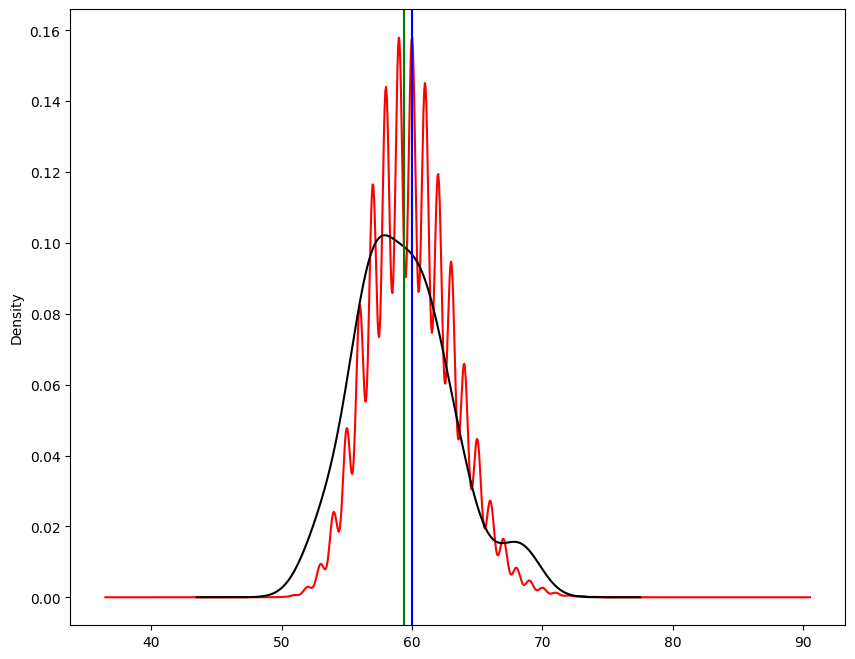

In [16]:
import scipy.stats as stats
import pandas as pd 
import numpy as np 
population = stats.poisson.rvs(loc=50, mu = 10, size = 100000)

sample = np.random.choice(population, 100)

plt.figure(figsize = (10, 8))

pd.Series(population).plot(kind = 'density', color = "red")

pd.Series(sample).plot(kind = 'density', color = "black")

plt.axvline(sample.mean(), color = "green")

plt.axvline(population.mean(), color = "blue")


In [18]:
print(f"Difference between population mean and sample mean : {population.mean() - sample.mean()}")

Difference between population mean and sample mean : 0.6047200000000004


Let us investigate how the sample mean change depending on the sample size:

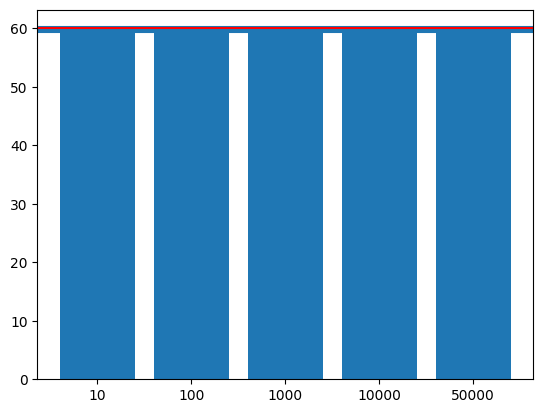

In [40]:
sample_size = [10, 100, 1000, 10000, 50000] 

sample_means = [np.random.choice(population, size).mean()for size in sample_size] 

sample_size_str = [str(size) for size in sample_size]

plt.bar(sample_size_str, sample_means)

for val in sample_means:
    plt.axhline(val)

plt.axhline(population.mean(), color = 'red')

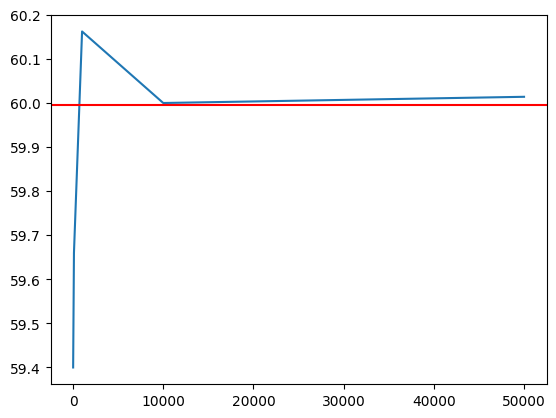

In [43]:
plt.plot(sample_size, sample_means)

plt.axhline(population.mean(), color = "red")

Sample mean gets closer as we increase the number of samples 

### Let us investigate the distribution of sample distributions 

In [70]:
import seaborn as sns 

def get_samples(population, sample_size, sample_number): 
    means = [np.random.choice(population, sample_size).mean() for _ in range(sample_number)]
    return means 

iteration = 1000 

sizes = [1, 100, 200, 300] 


sample_means = [get_samples(population=population, sample_size=size ,sample_number= iteration) for size in sizes ]

In [71]:
means = pd.DataFrame(sample_means).T

means.columns = [str(size) for size in sizes]

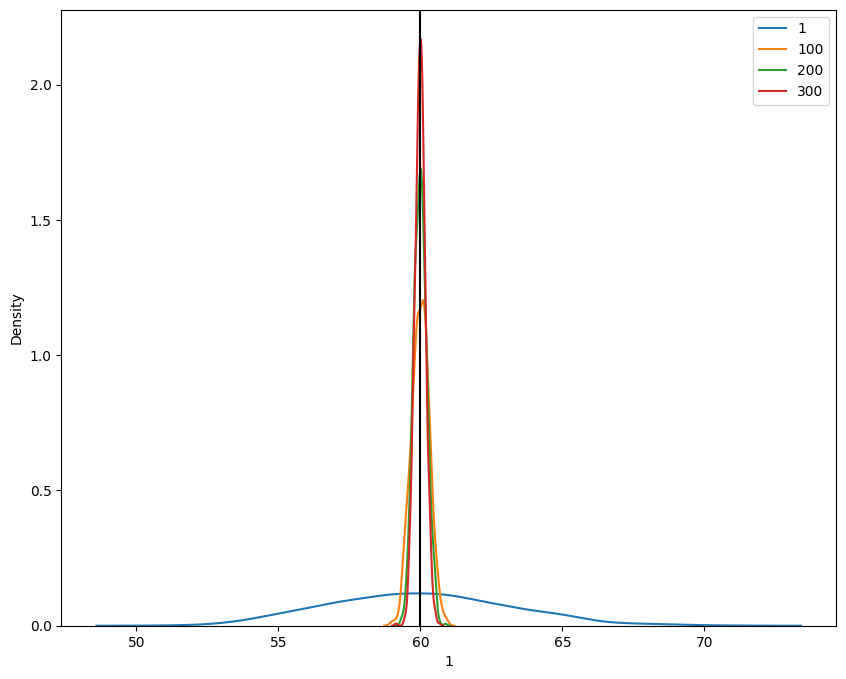

In [74]:
plt.figure(figsize = (10, 8))
for size in sizes: 
    sns.kdeplot(means[str(size)], fill = False, label = str(size))
plt.legend()

plt.axvline(population.mean(), color = "black")

Mode increases and deviation from the mean decreases as the number of samples gets greater !

Sample means are distributed around the population mean as the number of samples gets greater !